# TUGAS PRAKTIKUM CLUSTERING
Nama : Nadila Fitri Noviardhana

NIM : 164221006

Kelas : SD-A1

Topik : Keuangan


Penjelasan dan interpretasi dari hasil clustering ada pada file PDF beserta dengan screenshoot dari tiap hasil.

## Crawling dan Import Dataset

In [2]:
import wikipedia
import csv

wikipedia.set_lang("id")

judul = ["Akrual", "Aset", "Akun", "Deposito", "Ekuitas", "Debit", "Investasi", "Inflasi", "Jurnal", "Kredit"]

with open('wikipedia_pages.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Judul", "Konten"])

    for i in judul:
        try:
            halaman = wikipedia.page(i)
            konten = halaman.content 
            writer.writerow([i, konten])
            print(f"Berhasil menyimpan: {i}")
        except wikipedia.exceptions.DisambiguationError as e:
            print(f"Disambiguasi untuk: {i} - Dilewati")
        except wikipedia.exceptions.PageError as e:
            print(f"Halaman tidak ditemukan untuk: {i} - Dilewati")



Berhasil menyimpan: Akrual
Berhasil menyimpan: Aset
Berhasil menyimpan: Akun
Berhasil menyimpan: Deposito
Berhasil menyimpan: Ekuitas
Berhasil menyimpan: Debit
Berhasil menyimpan: Investasi
Berhasil menyimpan: Inflasi
Berhasil menyimpan: Jurnal
Berhasil menyimpan: Kredit


In [3]:
import pandas as pd

data = pd.read_csv("wikipedia_pages.csv")

data

,Judul,Konten
0,Akrual,Akrual adalah suatu metode akuntansi di mana p...
1,Aset,Aset atau aktiva adalah semua sumber ekonomi a...
2,Akun,Akun merupakan media akuntansi untuk mencatat ...
3,Deposito,Deposito adalah uang yang disimpan dalam reken...
4,Ekuitas,Ekuitas adalah jumlah uang yang akan dikembali...
5,Debit,Kartu debit adalah sebuah kartu pembayaran sec...
6,Investasi,"Investasi, penanaman modal, atau pelaburan ada..."
7,Inflasi,Inflasi merupakan suatu proses meningkatnya ha...
8,Jurnal,"Jurnal umum (bahasa Inggris: general journal, ..."
9,Kredit,Kredit adalah pemberian pinjaman atau pembiaya...


In [4]:
data["Konten"]

0    Akrual adalah suatu metode akuntansi di mana p...
1    Aset atau aktiva adalah semua sumber ekonomi a...
2    Akun merupakan media akuntansi untuk mencatat ...
3    Deposito adalah uang yang disimpan dalam reken...
4    Ekuitas adalah jumlah uang yang akan dikembali...
5    Kartu debit adalah sebuah kartu pembayaran sec...
6    Investasi, penanaman modal, atau pelaburan ada...
7    Inflasi merupakan suatu proses meningkatnya ha...
8    Jurnal umum (bahasa Inggris: general journal, ...
9    Kredit adalah pemberian pinjaman atau pembiaya...
Name: Konten, dtype: object

# Tokenisasi dan casefolding

In [5]:
from nltk import sent_tokenize 
from nltk import word_tokenize 
from nltk.corpus import stopwords
import regex as re

def preprocess(doc): 
  sents = word_tokenize(doc) 
  sents_tok = list() # tokenisasi kalimat 
  for s in sents : 
    s = s.strip().lower() # case folding dan menghilangkan new line 
    s= s.replace("\n", " ") # menggantikan \n dengan spasi 
    s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol 
    s = re.sub(' +', ' ', s) # menghapus repetitive space 
    sents_tok.append(s) 
  return " ". join(sents_tok)


docs_clear = list() 
for d in data["Konten"]: 
    docs_clear.append(preprocess(d))

docs_clear

['akrual adalah suatu metode akuntansi di mana penerimaan dan pengeluaran diakui atau dicatat ketika transaksi terjadi   bukan ketika uang kas untuk transaksi transaksi tersebut diterima atau dibayarkan   akrual akan mempengaruhi nilai dari suatu neraca karena melibatkan aset dan kewajiban   utang     dengan demikian pencatatan dalam metode ini bebas dari pengaruh waktu kapan kas diterima dan kapan pengeluaran dilakukan     akuntansi akrual   akuntansi akrual adalah suatu metode pencatatan akuntansi yang digunakan oleh perusahaan perusahaan yang mana di dalam mengakui suatu pendapatan ketika saat diperoleh dan kemudian mencatat suatu pengeluaran ketika benar benar terjadi   tanpa melihat adanya uang kas masuk ataupun kas keluar   artinya   perusahaan dapat segera mengakui suatu transaksi pendapatan dan pengeluaran walaupun belum menerima atau mengeluarkan uang     basis kas versus basis akrual   metode pencatatan akuntansi dengan basis akrual sangat berbeda dengan basis kas   jika pada

# Stopwords

In [6]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [7]:
stop_docs = []

for doc in docs_clear:
    cleaned_doc = stopword.remove(doc)
    stop_docs.append(cleaned_doc)

stop_docs

['akrual suatu metode akuntansi mana penerimaan pengeluaran diakui dicatat transaksi terjadi   bukan uang kas transaksi transaksi tersebut diterima dibayarkan   akrual mempengaruhi nilai suatu neraca melibatkan aset kewajiban   utang     demikian pencatatan metode bebas pengaruh waktu kapan kas diterima kapan pengeluaran dilakukan     akuntansi akrual   akuntansi akrual suatu metode pencatatan akuntansi digunakan perusahaan perusahaan mana mengakui suatu pendapatan diperoleh kemudian mencatat suatu pengeluaran benar benar terjadi   melihat adanya uang kas masuk ataupun kas keluar   artinya   perusahaan segera mengakui suatu transaksi pendapatan pengeluaran walaupun menerima mengeluarkan uang     basis kas versus basis akrual   metode pencatatan akuntansi basis akrual sangat berbeda basis kas   akuntansi berbasis kas   perusahaan mengakui suatu pendapatan menerima uang kas masuk mencatat transaksi pengeluaran terjadi uang kas keluar   metode basis kas   pengakuan pendapatan pengeluaran 

# Stemming

In [8]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()

stemmed_docs = []

for doc in stop_docs:
    stemmed_doc = stemmer.stem(doc)
    stemmed_docs.append(stemmed_doc)

In [9]:
stemmed_docs

['akrual suatu metode akuntansi mana terima keluar aku catat transaksi jadi bukan uang kas transaksi transaksi sebut terima bayar akrual pengaruh nilai suatu neraca libat aset wajib utang demikian catat metode bebas pengaruh waktu kapan kas terima kapan keluar laku akuntansi akrual akuntansi akrual suatu metode catat akuntansi guna usaha usaha mana aku suatu dapat oleh kemudian catat suatu keluar benar benar jadi lihat ada uang kas masuk atau kas keluar arti usaha segera aku suatu transaksi dapat keluar walaupun terima keluar uang basis kas versus basis akrual metode catat akuntansi basis akrual sangat beda basis kas akuntansi bas kas usaha aku suatu dapat terima uang kas masuk catat transaksi keluar jadi uang kas keluar metode basis kas aku dapat keluar jadi uang pindah tangan balik catat akuntansi guna metode basis akrual usaha aku dapat keluar jadi walaupun terima uang masuk keluar uang faktor faktor jadi beda utama metode akuntansi basis kas basis akrual waktu lihat segi waktu basi

# Word Cloud Keseluruhan

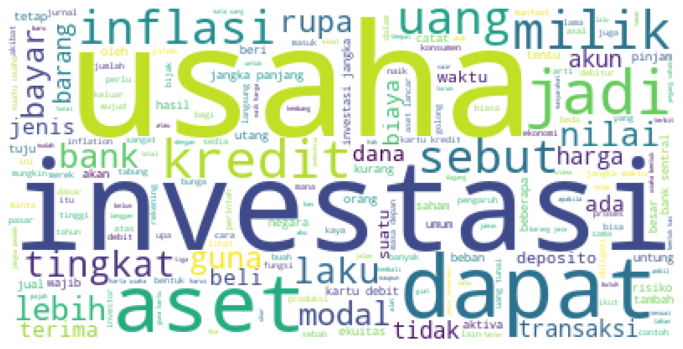

In [10]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

stemm_string = ' '.join(stemmed_docs)
wordcloud = WordCloud(background_color="white").generate(stemm_string)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

plt.axis("off")
plt.show()

# Most Common Word

In [11]:
token = word_tokenize(stemm_string)

In [12]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'usaha': 227, 'investasi': 162, 'uang': 128, 'kredit': 125, 'aset': 119, 'dapat': 111, 'bank': 93, 'jadi': 91, 'milik': 87, 'modal': 84, ...})

In [13]:
fdist1 = fdist.most_common(10)
fdist1

[('usaha', 227),
 ('investasi', 162),
 ('uang', 128),
 ('kredit', 125),
 ('aset', 119),
 ('dapat', 111),
 ('bank', 93),
 ('jadi', 91),
 ('milik', 87),
 ('modal', 84)]

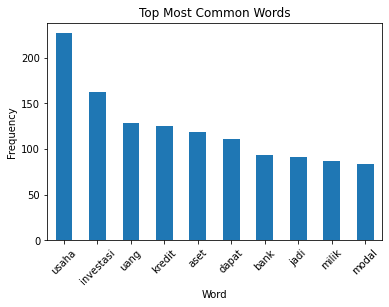

In [14]:
df_freq_tokens = pd.DataFrame.from_dict(fdist, orient='index', columns=['Frequency'])
df_freq_tokens.index.name = 'Word'

top_n = 10
df_top_n = df_freq_tokens.nlargest(top_n, 'Frequency')

df_top_n.plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top Most Common Words')
plt.xticks(rotation=45)
plt.show()

# Clustering

In [15]:
# representasi vektor dengan VSM-TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df = 2)
X = tfidf_vectorizer.fit_transform(stemmed_docs)
print(X)

  (0, 397)	0.03043654435883323
  (0, 325)	0.027060268995995222
  (0, 164)	0.03478932035360729
  (0, 246)	0.02430165116145644
  (0, 198)	0.08118080698798567
  (0, 294)	0.08118080698798567
  (0, 182)	0.06957864070721458
  (0, 226)	0.13915728141442915
  (0, 128)	0.13915728141442915
  (0, 32)	0.10824107598398089
  (0, 184)	0.03043654435883323
  (0, 205)	0.054120537991990444
  (0, 201)	0.16236161397597135
  (0, 381)	0.03478932035360729
  (0, 242)	0.1215082558072822
  (0, 112)	0.03478932035360729
  (0, 20)	0.1353013449799761
  (0, 27)	0.03478932035360729
  (0, 268)	0.054120537991990444
  (0, 394)	0.06087308871766646
  (0, 127)	0.03043654435883323
  (0, 329)	0.03043654435883323
  (0, 18)	0.03478932035360729
  (0, 28)	0.054120537991990444
  (0, 304)	0.02430165116145644
  :	:
  (9, 228)	0.02179611529283632
  (9, 89)	0.024270315583631633
  (9, 412)	0.013649246002939031
  (9, 129)	0.013649246002939031
  (9, 109)	0.054490288232090796
  (9, 205)	0.012135157791815817
  (9, 268)	0.012135157791815817


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

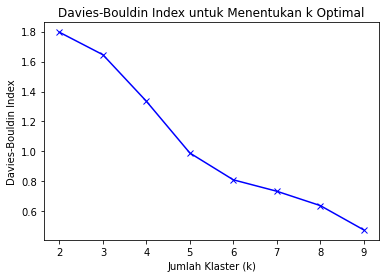

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

db_scores = []  

for k in range(2, 10): 
    km = KMeans(n_clusters=k, init='random', random_state=99)
    km.fit(X)
    labels = km.labels_
    db_scores.append(davies_bouldin_score(X.toarray(), labels))  

# Plot Davies-Bouldin Index
plt.plot(range(2, 10), db_scores, 'bx-')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index untuk Menentukan k Optimal')
plt.show()


Dari grafik tersebut menunjukkan nilai K optimal yang dapat digunakan adalah 3 cluster.

In [19]:
print(X.shape)
k = 3
seed= 99
km = cluster.KMeans(n_clusters=k, init='random', random_state=seed)
km.fit(X)

C_km= km.predict(X)
C_km

(10, 423)


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 2, 0, 2, 2, 1, 2, 2, 1, 1])

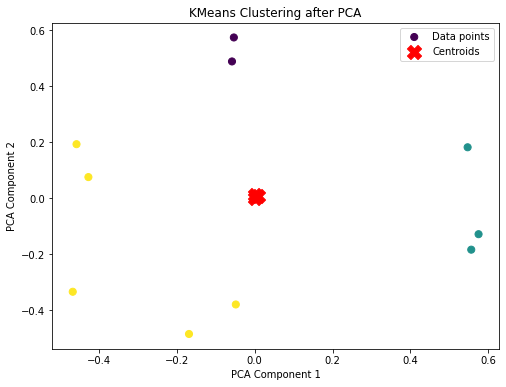

In [20]:
from sklearn.decomposition import PCA

X_dense = X.toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=C_km, s=50, cmap='viridis', label='Data points')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering after PCA')
plt.legend()
plt.show()


# Silhouette Score

In [21]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km]

for res in C:
    print(siluet(X, res))

0.08210142750542586


Selain visualisasi, diperlukan pula uji evaluasi menggunaan silhouette score. Dalam kode di atas menghasilkan output sebesar 0.06219. Hasil tersebut berarti sangat rendah dikarenakan nilai silhouette score merupakan rentang antara -1 dan 1. 

# Judul dari tiap cluster

In [22]:
from collections import defaultdict

clustered_docs = defaultdict(list)

for i, cluster_id in enumerate(C_km):
    clustered_docs[cluster_id].append({
        'Judul': data['Judul'].iloc[i],
    })

for cluster_id, docs in clustered_docs.items():
    print(f"Cluster {cluster_id}:")
    for doc in docs[:10]:  
        print(f"  Judul: {doc['Judul']}")


Cluster 0:
  Judul: Akrual
  Judul: Akun
Cluster 2:
  Judul: Aset
  Judul: Deposito
  Judul: Ekuitas
  Judul: Investasi
  Judul: Inflasi
Cluster 1:
  Judul: Debit
  Judul: Jurnal
  Judul: Kredit


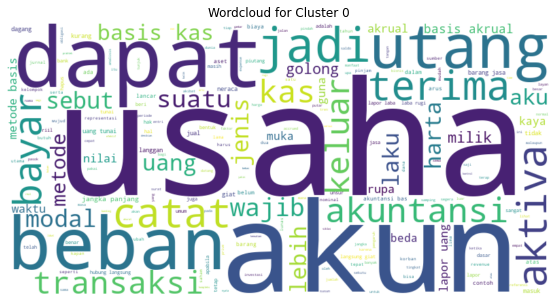

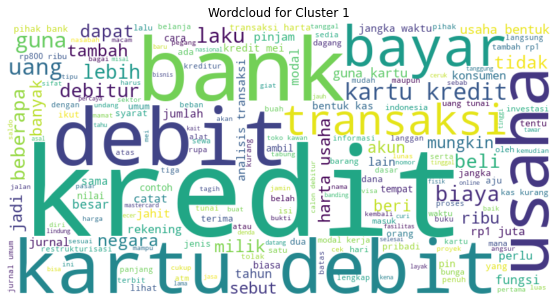

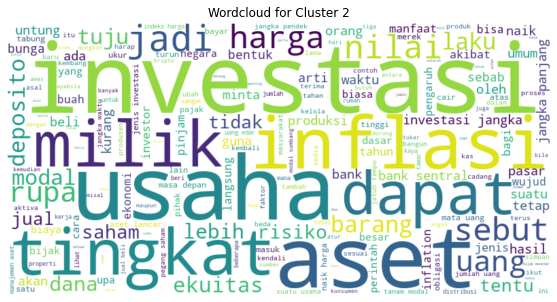

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

clusters = set(C_km)  
for cluster in clusters:
    cluster_indices = [i for i, label in enumerate(C_km) if label == cluster]

    cluster_text = " ".join([stemmed_docs[i] for i in cluster_indices])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    # Plot wordcloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for Cluster {cluster}')
    plt.show()
